In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000

In [2]:
data = pd.read_csv('sales-data.csv',parse_dates=['barr_date'])
data = data[(data.region_name=="India") & (data.business_area_name=="A00 - Equipment")]
data.rename(columns={"barr_date":"date","revenue": "sales"}, inplace=True)
display(data.head())

data = data[['date','sales']]
data.reset_index(drop=True, inplace=True)
data.head()

,business_area_name,region_name,date,sales
70,A00 - Equipment,India,2017-01-01,1252216.07
105,A00 - Equipment,India,2017-03-01,3008748.23
126,A00 - Equipment,India,2017-04-01,489400.00
196,A00 - Equipment,India,2017-07-01,1459550.00
217,A00 - Equipment,India,2017-08-01,2140161.00


,date,sales
0,2017-01-01,1252216.07
1,2017-03-01,3008748.23
2,2017-04-01,489400.00
3,2017-07-01,1459550.00
4,2017-08-01,2140161.00


In [3]:
data.shape

(54, 2)

<AxesSubplot:xlabel='Date', ylabel='Values'>

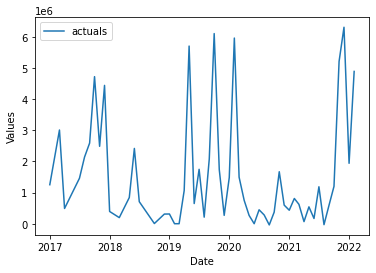

In [4]:
f = Forecaster(y=data['sales'],current_dates=data['date'])
f.plot()

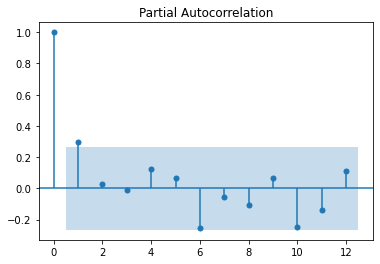

In [5]:
f.plot_pacf(lags=12)
plt.show()

In [6]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.2705 - val_loss: 0.2516
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 0.2675 - val_loss: 0.2487
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 0.2646 - val_loss: 0.2459
Epoch 4/50
1/1 [==============================] - 0s 20ms/step - loss: 0.2618 - val_loss: 0.2432
Epoch 5/50
1/1 [==============================] - 0s 20ms/step - loss: 0.2591 - val_loss: 0.2405
Epoch 6/50
1/1 [==============================] - 0s 20ms/step - loss: 0.2564 - val_loss: 0.2379
Epoch 7/50
1/1 [==============================] - 0s 20ms/step - loss: 0.2537 - val_loss: 0.2353
Epoch 8/50
1/1 [==============================] - 0s 21ms/step - loss: 0.2510 - val_loss: 0.2326
Epoch 9/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2483 - val_loss: 0.2301
Epoch 10/50
1/1 [==============================] - 0s 20ms/step - loss: 0.2457 - val_loss: 0.2276
Epoch 11/50
1/1 [==============

Epoch 35/50
2/2 [==============================] - 0s 25ms/step - loss: 0.1459 - val_loss: 0.2276
Epoch 36/50
2/2 [==============================] - 0s 29ms/step - loss: 0.1458 - val_loss: 0.2274
Epoch 37/50
2/2 [==============================] - 0s 34ms/step - loss: 0.1457 - val_loss: 0.2271
Epoch 38/50
2/2 [==============================] - 0s 38ms/step - loss: 0.1455 - val_loss: 0.2266
Epoch 39/50
2/2 [==============================] - 0s 40ms/step - loss: 0.1455 - val_loss: 0.2261
Epoch 40/50
2/2 [==============================] - 0s 35ms/step - loss: 0.1454 - val_loss: 0.2258
Epoch 41/50
2/2 [==============================] - 0s 25ms/step - loss: 0.1452 - val_loss: 0.2257
Epoch 42/50
2/2 [==============================] - 0s 26ms/step - loss: 0.1452 - val_loss: 0.2255
Epoch 43/50
2/2 [==============================] - 0s 24ms/step - loss: 0.1451 - val_loss: 0.2257
Epoch 44/50
2/2 [==============================] - 0s 30ms/step - loss: 0.1450 - val_loss: 0.2259
Epoch 45/50
2/2 [===

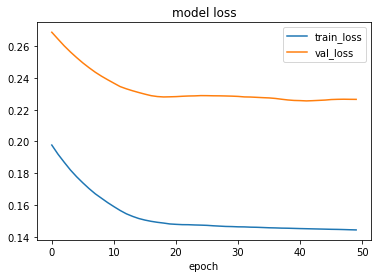

In [7]:
f.manual_forecast(call_me='lstm',
                  lags=12,
                  batch_size=16,
                  epochs=50,
                  validation_split=.20,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(25,)*1,
                  dropout=(0,)*1,
                  plot_loss=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

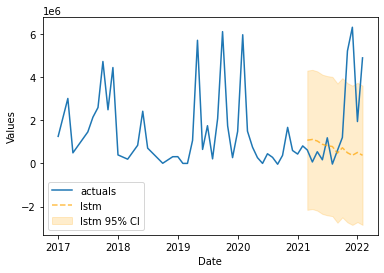

In [8]:
f.plot_test_set(ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

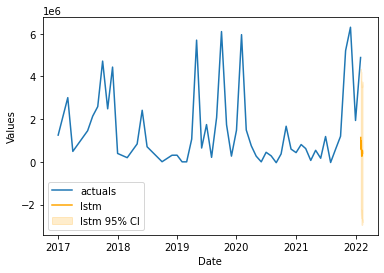

In [9]:
f.generate_future_dates(12)
f.add_time_trend()
f.export(to_excel=True,excel_name='results.xlsx')
f.plot(ci=True)

In [10]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm,4.40,2629241.75,-0.49,True


In [11]:
test_2021 = f.export_test_set_preds_with_cis('lstm')
display(test_2021.head(12))

predicted_2022 = f.export_forecasts_with_cis('lstm')
display(predicted_2022.head(12))

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,2021-03-01,4299129.32,1074108.34,622656.72,-2150912.65,lstm,0.95
1,2021-04-01,4334791.61,1109770.63,67416.48,-2115250.36,lstm,0.95
2,2021-05-01,4263390.95,1038369.97,541788.79,-2186651.02,lstm,0.95
3,2021-06-01,4109742.20,884721.21,168359.75,-2340299.77,lstm,0.95
4,2021-07-01,4045085.36,820064.37,1186474.87,-2404956.61,lstm,0.95
5,2021-08-01,4008189.56,783168.57,-30155.85,-2441852.41,lstm,0.95
6,2021-09-01,3702144.83,477123.85,600915.82,-2747897.14,lstm,0.95
7,2021-10-01,3949711.60,724690.62,1200354.07,-2500330.37,lstm,0.95
8,2021-11-01,3718670.33,493649.35,5210603.24,-2731371.64,lstm,0.95
9,2021-12-01,3600423.47,375402.49,6308381.00,-2849618.50,lstm,0.95


,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-02-02,4366837.05,1141816.07,-2083204.91,lstm,0.95
1,2022-02-03,3957584.97,732563.98,-2492457.00,lstm,0.95
2,2022-02-04,3823909.89,598888.91,-2626132.07,lstm,0.95
3,2022-02-05,4219056.76,994035.78,-2230985.21,lstm,0.95
4,2022-02-06,3793173.39,568152.40,-2656868.58,lstm,0.95
5,2022-02-07,3794138.30,569117.31,-2655903.67,lstm,0.95
6,2022-02-08,3494387.96,269366.98,-2955654.01,lstm,0.95
7,2022-02-09,3730349.41,505328.43,-2719692.56,lstm,0.95
8,2022-02-10,3628554.36,403533.37,-2821487.61,lstm,0.95
9,2022-02-11,3510172.89,285151.91,-2939869.08,lstm,0.95


In [12]:
Total_2021 = test_2021['Actuals'].sum()
Total_2022 = predicted_2022['Forecast'].sum()

Yoy_growth = (Total_2022 - Total_2021)/ Total_2021 * 100

print(f'Total_2021:{Total_2021}')
print(f'Total_2022:{Total_2022}')
print(f'YOY (growth):{Yoy_growth}')

Total_2021:22706087.794115
Total_2022:6996768.075245754
YOY (growth):-69.18549712883967
